In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv("zomato.csv" ,encoding="latin-1")

In [39]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cusine_count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,2


In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.drop(columns=["Longitude" ,"Latitude"] ,inplace=True)

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [9]:
cntry=df.groupby("Country Code")["Restaurant ID"].count().reset_index().sort_values(by="Restaurant ID",ascending=False)
cntry.rename(columns={"Restaurant ID" :"Count"} ,inplace=True)
cntry

,Country Code,Count
0,1,8652
14,216,434
13,215,80
2,30,60
9,189,60
12,214,60
5,148,40
11,208,34
1,14,24
6,162,22


<AxesSubplot:xlabel='Country Code', ylabel='Count'>

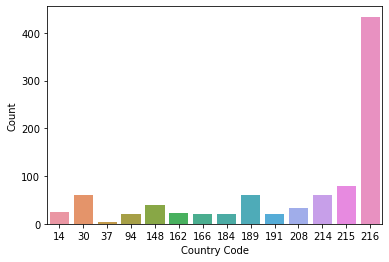

In [102]:
sns.barplot(x="Country Code" ,y='Count',data=cntry[cntry["Country Code"]!= 1].sort_values(by='Count',ascending=False)  )

In [17]:
df["Cuisines"].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [18]:
df["Cuisines"].fillna("NA" ,inplace=True)

In [19]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [20]:
cusines1={}
for a in df["Cuisines"]:
    for x in a.split(", "):
        if x in cusines1:
            cusines1[x]+=1
        else:
            cusines1[x]=1
            
            


In [21]:
cusines=pd.Series(cusines1)
cusines           

French              29
Japanese           135
Desserts           653
Seafood            174
Asian              233
                  ... 
Izgara               2
World Cuisine        4
Dí_ner               1
Restaurant Cafe      4
Bí_rek               1
Length: 146, dtype: int64

In [22]:
cusines=cusines.reset_index()

In [23]:
cusines.rename(columns={"index":"Cusine" ,0:"Count"} ,inplace=True)

In [24]:
cusines.head()

,Cusine,Count
0,French,29
1,Japanese,135
2,Desserts,653
3,Seafood,174
4,Asian,233


In [25]:
cusines.sort_values(by="Count",ascending=False ,inplace=True)

<BarContainer object of 5 artists>

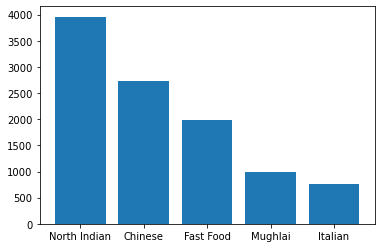

In [26]:
plt.bar(cusines["Cusine"].head() ,cusines["Count"].head())

In [27]:
df["Cusine_count"]=df["Cuisines"].map(lambda x:len(x.split(", ")))

In [28]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cusine_count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,2


<AxesSubplot:xlabel='Cusine_count', ylabel='count'>

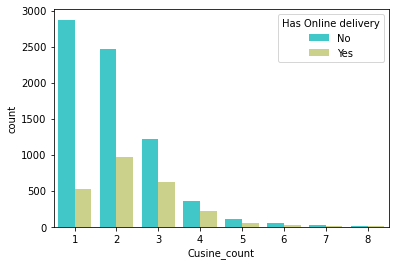

In [29]:
sns.countplot(x=df["Cusine_count"] ,data=df,hue="Has Online delivery" ,palette="rainbow")

In [91]:
df.corr()

,Restaurant ID,Country Code,Average Cost for two,Price range,Aggregate rating,Votes,Cusine_count
Restaurant ID,1.000000,0.148471,-0.001693,-0.134540,-0.326212,-0.147023,-0.074796
Country Code,0.148471,1.000000,0.043225,0.243327,0.282189,0.154530,0.008977
Average Cost for two,-0.001693,0.043225,1.000000,0.075083,0.051792,0.067783,0.013342
Price range,-0.134540,0.243327,0.075083,1.000000,0.437944,0.309444,0.312938
Aggregate rating,-0.326212,0.282189,0.051792,0.437944,1.000000,0.313691,0.249394
Votes,-0.147023,0.154530,0.067783,0.309444,0.313691,1.000000,0.183431
Cusine_count,-0.074796,0.008977,0.013342,0.312938,0.249394,0.183431,1.000000


<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

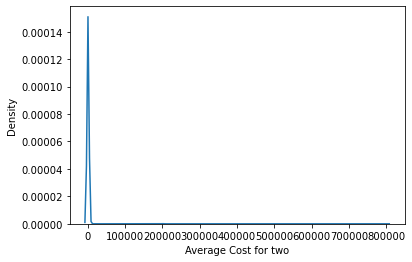

In [30]:
sns.kdeplot(df["Average Cost for two"])

In [31]:
#indication of ouliers from above graph
#lets check from its unique value and visualize with boxplot

In [93]:
df["Average Cost for two"].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

<AxesSubplot:xlabel='Average Cost for two'>

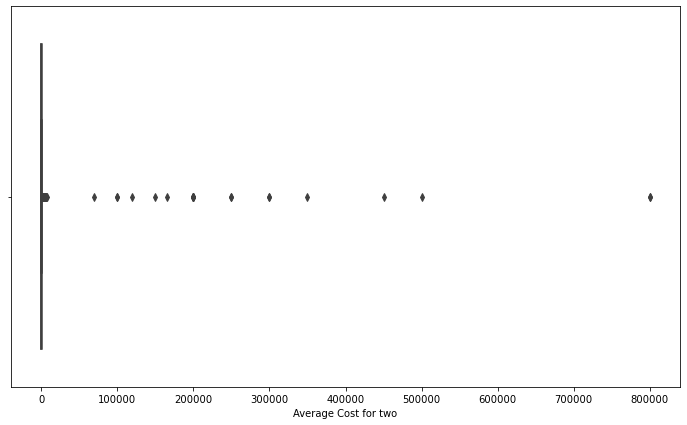

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df["Average Cost for two"])

In [41]:
#identifing outliers using IQR 
q1=np.percentile(df["Average Cost for two"],25)
q3=np.percentile(df["Average Cost for two"],75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [48]:
df[ df["Average Cost for two"]>upper_limit]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cusine_count
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,2
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...","Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520,2
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...","Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5800316,Cricket Club Cafe,191,Colombo,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo","Continental, American, Seafood",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,171,3
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo","Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196,2
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo","American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286,4
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",Seafood,4000,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203,1


In [66]:
drop_index=df[ df[]>upper_limit].index.tolist()

In [67]:
df.drop(index=drop_index ,inplace=True)

In [94]:
df["Price range"].unique()

array([3, 4, 2, 1], dtype=int64)

In [68]:
rating=df.groupby("Aggregate rating")["Votes"].sum().reset_index()

In [69]:
rating

,Aggregate rating,Votes
0,0.0,1847
1,1.8,322
2,1.9,212
3,2.0,678
4,2.1,1034
5,2.2,2448
6,2.3,3281
7,2.4,5112
8,2.5,8393
9,2.6,9214


<AxesSubplot:xlabel='Aggregate rating', ylabel='Votes'>

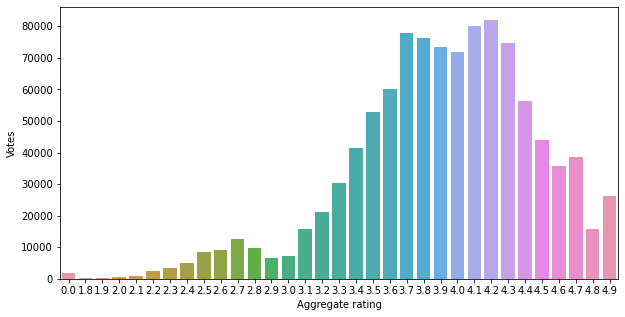

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(x="Aggregate rating" ,y="Votes",data=rating )

In [71]:
pr_cs_rt=df.pivot_table(index="Price range" ,columns="Cusine_count" , values="Average Cost for two" ,fill_value=0.0,aggfunc="mean")

In [72]:
pr_cs_rt

Cusine_count,1,2,3,4,5,6,7,8
Price range,,,,,,,,
1,258.077265,288.376987,293.412475,342.705882,350.000000,358.333333,300.000000,425.0
2,529.608939,587.094281,578.475690,602.719665,613.207547,664.285714,583.333333,562.5
3,609.832402,753.142384,825.211039,980.052632,970.277778,1023.529412,745.000000,1100.0
4,271.447368,267.265625,271.585366,633.000000,474.000000,396.666667,70.000000,727.5


In [78]:
from matplotlib.colors import LinearSegmentedColormap

<AxesSubplot:xlabel='Cusine_count', ylabel='Price range'>

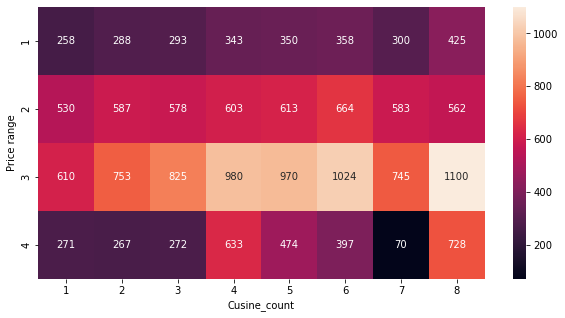

In [77]:
plt.figure(figsize=(10,5))
sns.heatmap(pr_cs_rt ,annot=True,fmt='.0f')

<AxesSubplot:xlabel='Cusine_count', ylabel='Price range'>

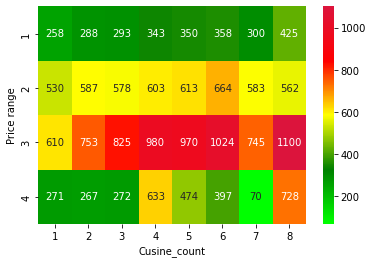

In [82]:
sns.heatmap(pr_cs_rt  ,annot=True,cmap= LinearSegmentedColormap.from_list('RedGreen', ['lime','green','yellow','red','crimson', ]),fmt='.0f')

In [126]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'Cusine_count'],
      dtype='object')

In [83]:
df.groupby(["Aggregate rating" ,"Rating text","Rating color"]).size().reset_index()

,Aggregate rating,Rating text,Rating color,0
0,0.0,Not rated,White,2130
1,1.8,Poor,Red,1
2,1.9,Poor,Red,2
3,2.0,Poor,Red,6
4,2.1,Poor,Red,13
5,2.2,Poor,Red,26
6,2.3,Poor,Red,47
7,2.4,Poor,Red,79
8,2.5,Average,Orange,106
9,2.6,Average,Orange,183


In [84]:
r=df.groupby(["Aggregate rating" ,"Rating text","Rating color"])["Restaurant ID"].count().reset_index()

In [85]:
r.rename(columns={"Restaurant ID" :"Count"},inplace=True)
r

,Aggregate rating,Rating text,Rating color,Count
0,0.0,Not rated,White,2130
1,1.8,Poor,Red,1
2,1.9,Poor,Red,2
3,2.0,Poor,Red,6
4,2.1,Poor,Red,13
5,2.2,Poor,Red,26
6,2.3,Poor,Red,47
7,2.4,Poor,Red,79
8,2.5,Average,Orange,106
9,2.6,Average,Orange,183


<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

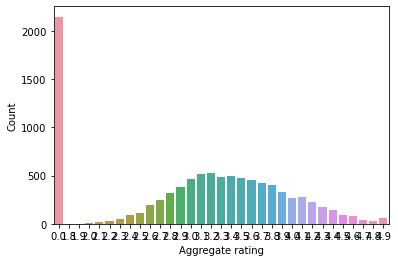

In [140]:
sns.barplot(x="Aggregate rating" ,y="Count" ,data=r)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

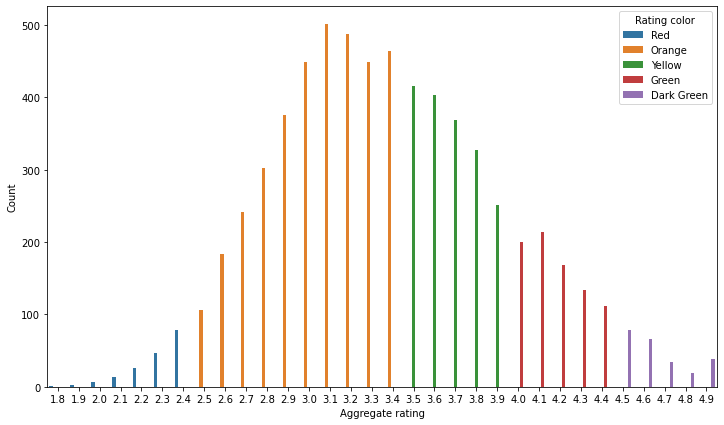

In [93]:
plt.figure(figsize=(12,7))
sns.barplot(x="Aggregate rating" ,y="Count" ,data=r.iloc[1:,:] ,hue="Rating color")

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

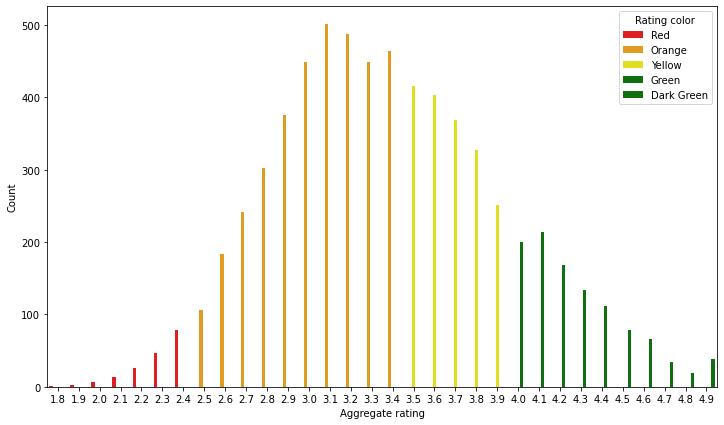

In [92]:
plt.figure(figsize=(12,7))
sns.barplot(x="Aggregate rating" ,y="Count" ,data=r.iloc[1:,:] ,hue="Rating color" ,palette=["Red" ,"Orange" ,"Yellow" ,"Green" ,"Green"])